In [4]:
from astropy.time import Time
from astropy.io import ascii
import matplotlib.pyplot as plt
import astropy.units as u
%matplotlib inline

In [58]:
projs = """
date       months   type    page  comment
2017-09-10 5  release 0  'Meeting with Belinda: CSC2 in Feb 2018'
2016-09-27 10 release 16 'Full slide: Why do we believe this projection'
2016-04-12 5  release 18 'Archive catalog release Early Fall 2016'
2015-09-29 9  limit   20 'Summer 2016 for source phase'
2014-10-23 14 release 15 'Start QA late 2015 + ~month to complete'
2013-10-22 14 release 20 'Cat 5.0 Winter 2014'
2012-10-10 14 release 15 'Targeting cat release 2 in late 2013'
2011-10-13 12 limit   16 'Rel. 2.0 processing no earlier than Fall 2012'
"""

projs = ascii.read(projs)
projs['date'] = Time(projs['date'])

In [59]:
projs['release'] = projs['date'] + projs['months'] / 12 * 365 * u.day

In [60]:
ok = projs['type'] == 'release'
pok = projs[ok]
dates = pok['date'].decimalyear
proj_dates = pok['release'].decimalyear
r = np.polyfit(dates, proj_dates, 1)
x = [2012, 2022]
y = np.polyval(r, x)

In [61]:
def plot_csc2(plot_fit=False):
    date1 = 2022 if plot_fit else 2019
    plt.figure(figsize=(7, 5))
    plt.plot([2011.0, date1], [2011.0, date1], '--', lw=3, alpha=0.5)

    for ii, proj in enumerate(projs):
        date = proj['date'].decimalyear
        proj_date = proj['release'].decimalyear
        plt.plot([date], [proj_date], 'o', 
                 label=proj['date'].iso[:7] + ': ' + proj['comment'])
        if proj['type'] == 'limit':
            plt.arrow(date, proj_date, 0, 1, 
                      head_width=0.2, head_length=0.2, fc='C{}'.format(ii+1), ec='C{}'.format(ii+1))
            
    if plot_fit:
        plt.plot(x, y, '--r', alpha=0.5)

    plt.grid(alpha=0.5)
    plt.legend(loc='lower right', fontsize='small')
    plt.xlabel('Date of projection')
    plt.ylabel('Projected release date')
    plt.title('Projected CSC2 release date vs. time')
    plt.tight_layout()
plt.savefig('csc2_release_vs_time.png', dpi=100)

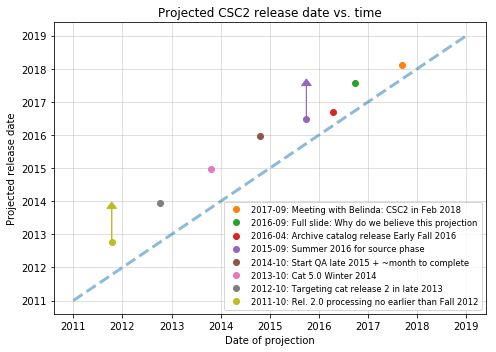

In [62]:
plot_csc2()

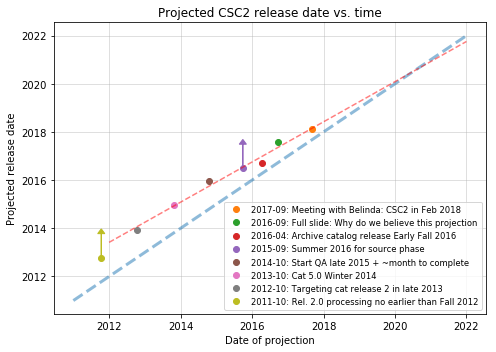

In [63]:
plot_csc2(plot_fit=True)